<a href="https://colab.research.google.com/github/otacabral/data-science---otacabral/blob/main/Projeto_1_Analisando_os_Dados_do_airBnB_(cidade_de_Atenas)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#*Análise dos dados Airbnb - em Atenas, Grécia*
### O sistema airbnb foi um evento revolucionário no processo de hospedagens, ultrapassando grandes empresas hoteleiras existentes no mundo.
### Consiste basicamente em uma interação fácil e acessível entre anfitriões e hóspedes, no qual o proprietário disponibiliza moradia temporária através do site oficial [airbnb.com](https://www.airbnb.com.br/). Com preços acessíveis e uma gama enorme de possibilidades, a empresa vem ganhando destaque na atualidade.

##**Atenas, a cidade grega.**
###A Grécia atualmente é um país que possui seu pib local contribuido principalmente pelo setor turístico. Não só por fatores históricos que regulamentaram principalmente o sistema político adotado por boa parte dos países ocidentais, mas também pelas belíssimas praias e ilhas mediterrâneas com uma arquitetura extremamente característica.

![alt text](https://drive.google.com/uc?export=view&id=1Lk29QvQxXFz_OOdFSxXn8GV7fVSIuuE1)

### Atenas, é considerada por muitos historiadores como o berço da democracia, no qual todos os cidadãos atenienses tinham direito de discutir a política da polis de forma direta. As Ágoras eram consideradas "praças públicas" nos quais eram debatidas ideias vigentes.

### Um dos pontos túristicos mais emblemáticos de Atenas foi a sua acrópole, que consistia basicamente num centro admnistrativo e religioso da pólis. 
![alt text](https://drive.google.com/uc?export=view&id=1yn9L7tttBpel0r4ZuBV5HySxR81BN35Z)


## **visto tudo isso, vamos processar os dados disponibilizados no site http://insideairbnb.com/get-the-data.html, oficial do airbnb, e tirar algumas conclusões sobre as opções de hospedagem em Atenas!**

#Para início de análise, vamos fazer o dowload do arquivo 

* ### `listings.csv`	Summary information and metrics for listings in Athens (good for visualisations).

#encontrado no site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

### importante frisar que o site constantemente modifica a lista de informações conforme o tempo passa. Desta forma, a análise será feita para a lista do dia *25 de outubro, 2021*.

###portanto, para não gerar erro nas linhas de códigos, vamos fazer a leitura deste mesmo arquivo salva em uma núvem.

In [1]:
#importando as bibliotecas necessárias.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#gerando um dataframe a partir do arquivo.
df = pd.read_csv("http://data.insideairbnb.com/greece/attica/athens/2021-10-25/visualisations/listings.csv")

##importado os dados, vamos fazer uma breve análise sobre os mesmos observando as cinco primeiras entradas.

##Em seguida, faremos uma tabela com os significados de todas as variáveis.

In [3]:
# cinco primeiras entradas.
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,10595,"96m2, 3BR, 2BA, Metro, WI-FI etc...",37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,79,1,32,2019-04-04,0.41,6,170,7,00000957568
1,10990,Athens Quality Apartments - Deluxe Apartment,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98903,23.76448,Entire home/apt,50,1,52,2016-02-22,0.72,6,361,12,00001070920
2,10993,Athens Quality Apartments - Studio,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98888,23.76473,Entire home/apt,38,1,71,2018-03-31,0.97,6,331,19,00000957080
3,10995,"AQA-No2 1-bedroom, smart tv, fiber connection,",37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98903,23.76448,Entire home/apt,48,1,24,2016-08-06,0.33,6,357,1,00000957422
4,27262,"54m2, 1-br, cable tv, wi-fi, metro",37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98924,23.76500,Entire home/apt,47,1,17,2017-05-15,0.23,6,208,0,00000957579


#Dicionário das variáveis.
* ## *id* - código ultilizado para identificação dos imóveis.
* ## *name* - nome da propiedade anunciada.
* ## *host_id* - código referente ao anfitrião de uma ou mais propiedades.
* ## *host_name* - nome do anfitrião da propiedade.
* ## *neighbourhood_group* - não possui informação nenhuma.
* ## *neighbourhood* - bairro no qual se encontra a propiedade.
* ## *latitude* - latitude da propiedade.
* ## *longitude* - longitude da propiedade.
* ## *room_type* - informa qual formato a propiedade vai ser oferecida. (a casa inteira, um comodo apenas, etc..)
* ## *price* - preço para alugar o imóvel.
* ## *minimum_nights* - quantidade mínima de noites impostas pelo anfitrião.
* ## *number_of_reviews* - número de reviews que a propiedade possui.
* ## *last_review* - data do último review feito.
* ## *reviews_per_month* - quantidade de reviews por mês.
* ## *calculated_host_listings_count* - quantidade de imóveis que o anfitrião tem disponibilizados no site.
* ## *availability_365* - número de dias disponíveis que o imóvel tem durante um período de um ano.
* ## *number_of_reviews_ltm* - número de reviews feitos nos últimos doze meses.
* ## *license* - número de licença do dado.





# **1º) quantidade de dados e seus tipos.**
##Agora, veremos quantos dados nosso dataframe possui e os tipos de informações contidas em cada coluna.

In [4]:
#volume de dados.
print('Entradas: {}'.format(df.shape[0]))
print('variáveis: {}\n'.format(df.shape[1]))

#formato dos valores encontrados em cada coluna
display(df.dtypes)

Entradas: 9582
variáveis: 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

#**2º)Valores ausentes e suas porcentagens.**
##Dentro de uma tabela de dados, os valores ausentes podem nos dar informações implícitas que são importantes. Nem sempre é apenas a ausência de informação, pode ser a representação de uma string ou valor nulo "0". Dessa forma, veremos quantos valores ausentes nós temos por colunas e suas respectivas porcentagens relativas ao total.

In [5]:
# porcentagem dos valores ausentes em ordem decrescente.
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)

neighbourhood_group               1.000000
license                           0.200584
reviews_per_month                 0.178251
last_review                       0.178251
name                              0.000313
host_name                         0.000313
longitude                         0.000000
host_id                           0.000000
neighbourhood                     0.000000
latitude                          0.000000
room_type                         0.000000
number_of_reviews_ltm             0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
id                                0.000000
dtype: float64

#repare que:


##1.   A coluna `neighbourhood_group` não possui nenhuma informação
##2.   Aproximadamente 20% dos dados de `license` são ausentes.
##3.   Repare que existe **exatamente** o mesmo número de dados ausentes nas colunas `reviews_per_month` e `last_review`, isso sugere que onde um é ausente o outro também é
##4.   Seguindo o mesmo raciocínio do item (3), os dados que não possuirem valores em `name` também não terá em `host_name`


# **3º)Distribuição gráfica das variáveis através de histogramas!**

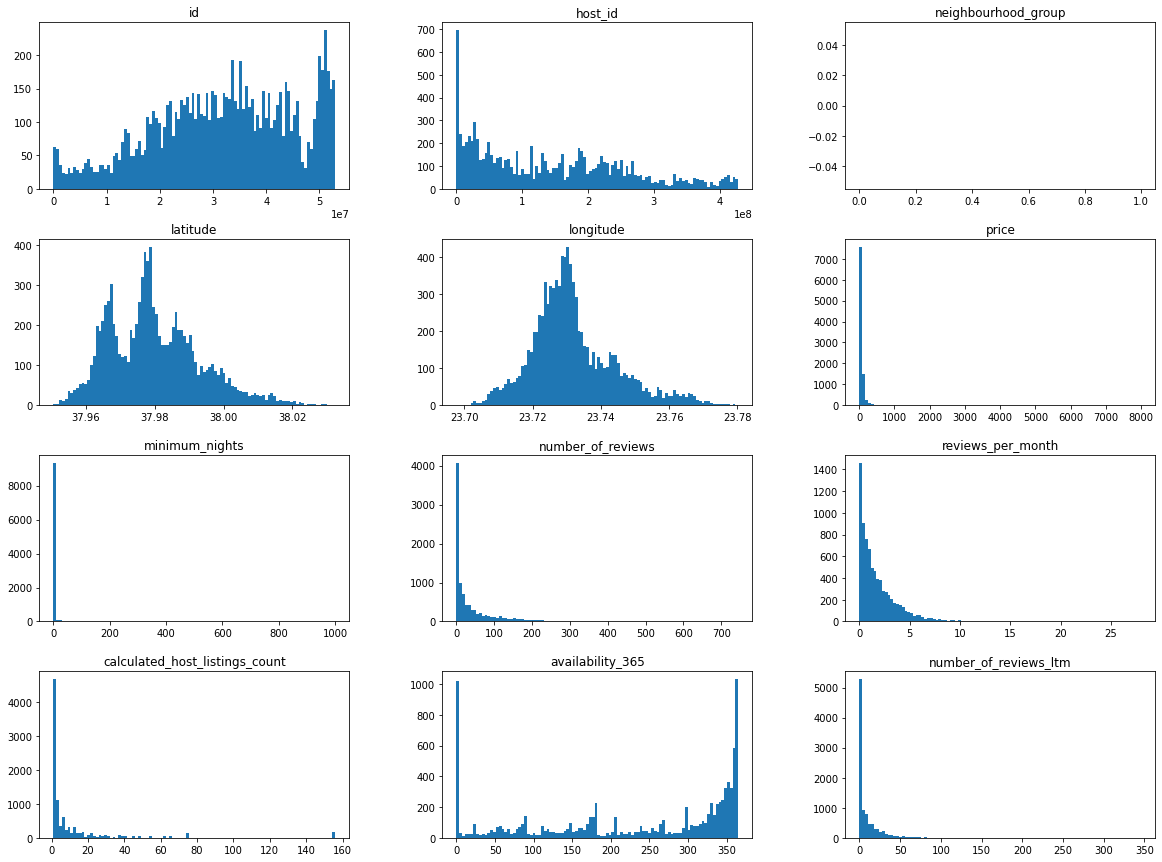

In [6]:
#plotar histograma de todas as colunas.
df.hist(bins = 100, figsize=(20,15),grid = False);

# **4º) Análise dos outliers**
## observando os dados em histograma, não temos uma noção visual tão precisa quanto a presença de outliers, porém, alguns dados são questionáveis como por exemplo ter tido um caso com  1000 dias de aluguel da casa.

## Dessa forma, vamos ultilizar o mecanismo `describe` para vermos melhor como se encontram esses dados e suas distribuições.

In [7]:
# Análise estatística dos dados.
df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,9.582000e+03,9.582000e+03,0.0,9582.000000,9582.000000,9582.000000,9582.000000,9582.000000,7874.000000,9582.000000,9582.000000,9582.000000
mean,3.189967e+07,1.437052e+08,NaN,37.979937,23.731852,83.438113,3.265811,42.434460,1.860970,11.083072,230.261010,8.671885
std,1.331709e+07,1.153289e+08,NaN,0.013226,0.012372,299.558115,19.924228,69.982756,2.049245,23.451291,130.262062,14.536008
min,1.059500e+04,3.717700e+04,NaN,37.950550,23.697700,9.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.251695e+07,3.849921e+07,NaN,37.969223,23.724032,36.000000,1.000000,2.000000,0.430000,1.000000,117.000000,0.000000
50%,3.278173e+07,1.288502e+08,NaN,37.978386,23.729830,50.000000,2.000000,12.000000,1.200000,3.000000,283.000000,2.000000
75%,4.264848e+07,2.244519e+08,NaN,37.987960,23.737930,80.000000,2.000000,52.000000,2.640000,9.000000,350.000000,12.000000
max,5.296030e+07,4.281993e+08,NaN,38.032430,23.780220,8000.000000,1000.000000,745.000000,28.000000,156.000000,365.000000,346.000000


## Observe a distribuição de valores principalmente das colunas "price", "minimun_nights", "number_of_reviews". Repare que existe uma boa distribuição de dados até chegar ao último quartil.
## Com isso, vamos fazer uma breve limpeza nestes outliers.

##**Boxplot** `minimun nights`

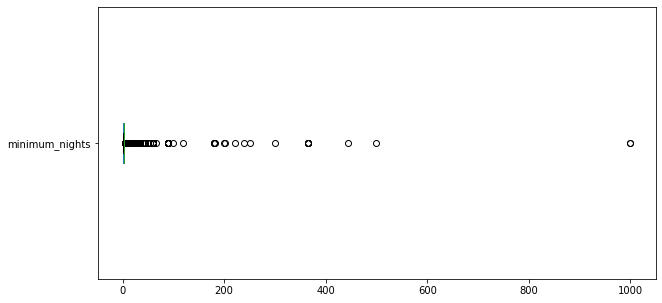

valores acima de 30 dias: 59 entradas
porcentagem correspondente: 0.6157%


In [8]:
#boxplot
df.minimum_nights.plot(kind='box',vert = False, figsize=(10,5))
plt.show()
#número de outliers em minimun_nights.
outMn = (df.minimum_nights > 30).sum();

print('valores acima de 30 dias: {} entradas'.format(outMn))
print('porcentagem correspondente: {:.4f}%'.format((outMn / df.shape[0])*100))


##**Boxplot** `price`

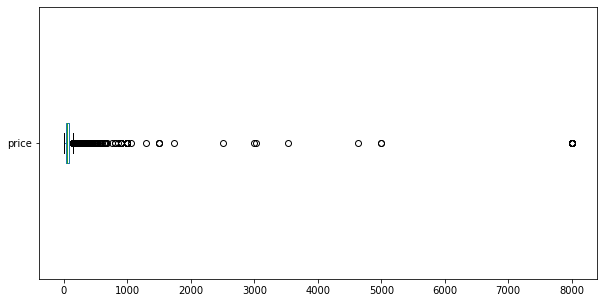

valores acima de 500 $: 63 entradas
porcentagem correspondente: 0.6575%


In [9]:
#boxplot
df.price.plot(kind='box',vert = False, figsize=(10,5))
plt.show()
#número de outliers em price
outPr = (df.price > 500).sum();
print('valores acima de 500 $: {} entradas'.format(outPr))
print('porcentagem correspondente: {:.4f}%'.format((outPr / df.shape[0])*100))

#**5º) limpeza dos dados**
## visto a representação dos outliers principalmente nos gráficos de caixa, vamos a limpeza dos mesmos para facilitar uma análise geral.

In [10]:
#criando um novo data frame "limpo":
A = df.drop(df.loc[df.minimum_nights > 30].index, axis=0,inplace = False)
df_clean = A.drop(A.loc[A.price > 500].index,axis=0, inplace= False)
# removendo a coluna "neighbourhood_group" visto que só possui entradas NaN
df_clean.drop('neighbourhood_group',axis=1,inplace= True)

#**6º) Novo plot com os dados limpos.**

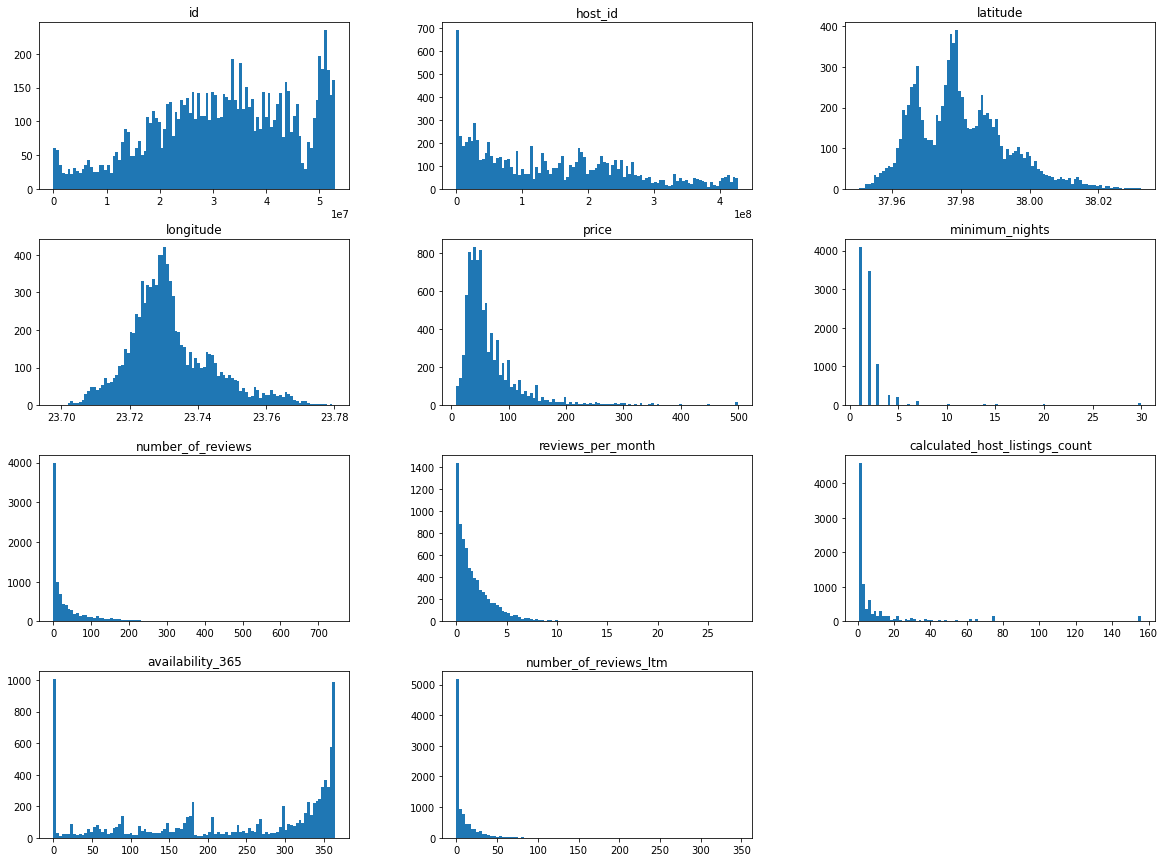

In [11]:
#histograma(2.0):
df_clean.hist(bins = 100, figsize=(20,15),grid = False);

#**7º) buscando correlação entre nossas variáveis.**
## Em geral, nosso senso crítico consegue correlacionar bem as coisas e supor que tais relações existam. Para isso, nos apropriaremos de algorítimos robustos capazes de criar uma correlação entre duas variáveis selecionadas.

###Com objetivo de gerar um mapa de calor com as correlações devemos:

* gerar uma matriz correlação
* criar o heatmap dessa matriz usando a biblioteca `seaborn`

*obs: o algorítimo só funciona para variáveis numéricas.*

In [12]:
#matriz correlação.
rel = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month','calculated_host_listings_count', 'availability_365','number_of_reviews_ltm']].corr()
display(rel)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
price,1.000000,-0.080578,-0.094794,-0.047080,0.020435,0.131235,-0.068892
minimum_nights,-0.080578,1.000000,-0.071295,-0.127368,-0.081045,-0.094701,-0.118633
number_of_reviews,-0.094794,-0.071295,1.000000,0.511823,0.008178,0.025675,0.586276
reviews_per_month,-0.047080,-0.127368,0.511823,1.000000,0.070347,0.114625,0.654508
calculated_host_listings_count,0.020435,-0.081045,0.008178,0.070347,1.000000,0.057922,0.101687
availability_365,0.131235,-0.094701,0.025675,0.114625,0.057922,1.000000,0.106315
number_of_reviews_ltm,-0.068892,-0.118633,0.586276,0.654508,0.101687,0.106315,1.000000


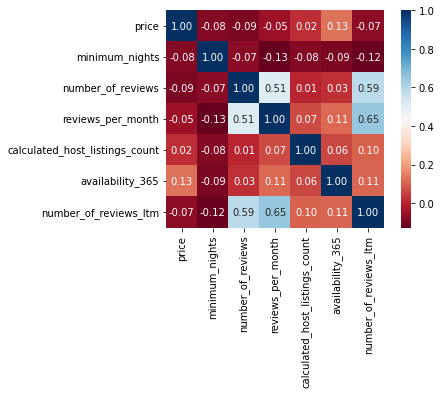

In [13]:
#mapa estilo heat.map:
sns.heatmap(rel, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

#**8º) Tipo de imóvel mais alugado no airBnB**
## para fazer tal análise, basta selecionar a coluna `room_type`e ver a quantidade presente de cada tipo de alocação.

In [14]:
#quantidade de variávies.
df_clean.room_type.value_counts()

Entire home/apt    8371
Private room        866
Hotel room          135
Shared room          90
Name: room_type, dtype: int64

In [15]:
#porcentagem correspondente.
df_clean.room_type.value_counts() / df_clean.shape[0]


Entire home/apt    0.884697
Private room       0.091524
Hotel room         0.014268
Shared room        0.009512
Name: room_type, dtype: float64

#**9º) Bairro mais caro em Atenas.**


## Nós sabemos que em geral, o que define o preço de uma hospedagem é o local da propiedade e o tempo alugado. Dessa forma, como nosso objetivo é analisar as localidades mais caras independente do tempo mínimo passado, vamos criar uma coluna que retrate o preço pelo número de dias alugados.
## Com isso, teremos uma melhor análise de nossos dados.

In [16]:
#data frame com a coluna nova "price_per_day"
df_clean_pt1 = df_clean.copy()
price_per_day = (df_clean_pt1.price) / df_clean_pt1.minimum_nights
df_clean_pt1['price_per_day'] = price_per_day

##Vamos ultilizar agora a ferramenta `groupby`com objetivo de separar nossos dados em grupos e conseguir estimar algum valor para cada um desses grupos. No caso o valor estimado será a média dos preços obtidos naquele conjunto.

In [17]:
#tabela com a média dos preços por bairro.
df_clean_pt1.groupby(['neighbourhood']).price_per_day.mean().sort_values(ascending=False)[:10]

neighbourhood
ΖΑΠΠΕΙΟ                   78.822131
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ    69.348833
ΚΕΡΑΜΕΙΚΟΣ                64.937177
ΓΚΑΖΙ                     64.590608
ΑΚΡΟΠΟΛΗ                  61.911866
ΚΟΛΩΝΑΚΙ                  60.968200
ΡΗΓΙΛΛΗΣ                  60.833333
ΒΟΤΑΝΙΚΟΣ                 55.881389
ΘΗΣΕΙΟ                    54.911906
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ       54.467674
Name: price_per_day, dtype: float64

In [18]:
#representação do bairro 'ΖΑΠΠΕΙΟ'
df_clean_pt1[df_clean_pt1.neighbourhood == 'ΖΑΠΠΕΙΟ']

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,price_per_day
127,1177492,Trad Studio Appt - Central Athens,6442400,Rio,ΖΑΠΠΕΙΟ,37.967950,23.736120,Entire home/apt,35,1,745,2021-10-09,7.34,1,328,31,00001119575,35.000000
329,5025556,In the heart of the city,6515798,Athanasios,ΖΑΠΠΕΙΟ,37.967690,23.732860,Entire home/apt,263,1,574,2021-10-21,7.23,4,288,48,NaN,263.000000
477,7385886,Aris Athens Suites - K1 Suite,38531462,Aris Athens Suites,ΖΑΠΠΕΙΟ,37.967140,23.733130,Entire home/apt,100,2,2,2021-03-31,0.22,8,344,2,0206Κ12000345000,50.000000
630,10045648,Romantic and Clean Apartment -near Acropolis-,3421891,Peter,ΖΑΠΠΕΙΟ,37.966990,23.730760,Entire home/apt,29,2,132,2021-06-20,1.92,2,348,14,00001290225,14.500000
682,10890756,KONNET APP Olympian Zeus houses 2,31256039,Dcn Zeus,ΖΑΠΠΕΙΟ,37.966710,23.734590,Entire home/apt,36,2,212,2021-10-02,3.11,2,345,24,00001263378,18.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9093,51380408,Eclectic Studio with Skyroof near The Acropolis!,330622463,Spyros,ΖΑΠΠΕΙΟ,37.967049,23.731310,Entire home/apt,46,2,11,2021-10-09,4.71,27,361,11,00001304232,23.000000
9147,51548125,Classic Athens apartment - 3min to Acropolis,361159759,Antonia,ΖΑΠΠΕΙΟ,37.969230,23.731900,Entire home/apt,109,2,12,2021-10-04,5.54,1,351,12,00001316102,54.500000
9218,51740495,Karma Plaka Athens luxury apartment with balcony,63047603,Ioannis,ΖΑΠΠΕΙΟ,37.971840,23.733600,Entire home/apt,120,1,0,NaN,NaN,6,359,0,00001329101,120.000000
9401,52315294,Cozy apartment in the heart of the city,25485075,Nikolaos,ΖΑΠΠΕΙΟ,37.971020,23.741350,Entire home/apt,80,3,0,NaN,NaN,3,364,0,00001350313,26.666667


##Se nós observamos os nomes dos imóveis nesse bairro, veremos que todos remetem ao centro de ATENAS, alguns até mesmo próximo da Acrópole como no caso de "*Classic Athens apartment - 3min to Acropolis*". E na introdução deste projeto ,foi mostrado que a acrópole grega era um ponto turístico extremamente importante para a cidade, logo o bairro provavelmente é um dos mais caros da cidade.

## Visto que as coordenadas de latitude e longitude foram oferecidas para cada index, vamos plotar graficamente as mesmas. tomando a coordenada x como `longitude` e a coordenada y como `latitude`.

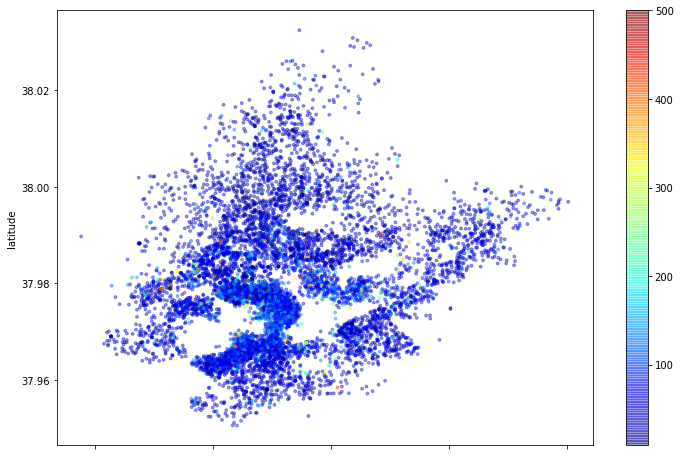

In [19]:
#plot dos imóveis pela latitude - longitude.
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## faça a comparação dos dados projetados com suas devidas coordenadas e o mapa da própia cidade de Atenas para tirar as conclusões.
![alt text](https://drive.google.com/uc?export=view&id=1KhGPw6kaMIv_R3zfkBz2TB5gs7Mzilxw)

#**Conclusão:**
## Como o intuito do projeto era fazer uma exploração simplificada das propiedades disponíveis para aluguel do site [Airbnb](https://www.airbnb.com.br/), esta análise não é completamente precisa, mas trás uma base de noção sobre os dados da cidade.
## Percebemos também a presença de outliers que possivelmente distorceriam as análises de preço e localidade.
## Dessa forma, trabalhamos com uma limpeza de outliers e colunas vazias como a "`neighbourhood_group`"

acesse a mais documentos como esse em [github/otacabral](https://github.com/otacabral/data-science---otacabral)